In [58]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install matplotlib

In [62]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
data = pd.read_csv("iris.csv")
data
#Loading data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
print("\nLoaded Data:\n------------------------------------------------------------------")
print(data.head())


Loaded Data:
------------------------------------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [66]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
#Using a label encoder to convert string to numeric values

In [67]:
#Convert input to numpy array
np_iris = data.to_numpy()

#Seprate features and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

print("\nFeatures before scaling :\n---------------------")
print(X_data[:5,:])
print("\nTraget before scaling :n\---------------")
print(Y_data[:5])

#Create a scaler model
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature 
X_data = scaler.transform(X_data)

#Convert target variables as one hot encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)


Features before scaling :
---------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Traget before scaling :n\---------------
[0. 0. 0. 0. 0.]


In [68]:
#Spliting training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X_data, Y_data, test_size = 0.10)

print("\nTrain test dimensions: \n--------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train test dimensions: 
--------------
(135, 4) (135, 3) (15, 4) (15, 3)


### Creating a Model 
1. No of hidden layers
2. No of nodes in each layer
3. Activation functions
4. Loss function and Accuracy measure

In [69]:
from tensorflow import keras

#No of classes in the target variables
NB_CLASSES = 3

#Create a sequencial model in keras
model = tf.keras.models.Sequential()

#Adding the first hidden layer
model.add(keras.layers.Dense(128, input_shape=(4,), name='Hidden_layer1', activation = 'relu'))
#Adding the secong hidden layer
model.add(keras.layers.Dense(128, name='Hidden_layer2', activation ='relu'))
#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES, name= 'Output_layer', activation = 'softmax'))

#Compile the model with loss and metrics 
model.compile(loss ='categorical_crossentropy', metrics =['accuracy'])

#Print the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 128)               640       
                                                                 
 Hidden_layer2 (Dense)       (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [70]:
VERBOSE = 1

#Setup hyper para for training
#Set batch size
BATCH_SIZE = 16
#Set no of epochs
EPOCHS = 10
#Set validation split 20% of the traning data 
VALIDATION_SPLIT = 0.2

print("\nTraining Progress: \n-------------------------")

#Fit the model, forward propagation, loss computation, backward propagation
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   verbose=VERBOSE,
                   validation_split=VALIDATION_SPLIT)

print("\nAccuracy during tarining :\n-------------------")


Training Progress: 
-------------------------
Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 0.8285 - accuracy: 0.7407 - val_loss: 0.7160 - val_accuracy: 0.7037
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5270 - accuracy: 0.8611 - val_loss: 0.5978 - val_accuracy: 0.7037
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8704 - val_loss: 0.5252 - val_accuracy: 0.7037
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3244 - accuracy: 0.8889 - val_loss: 0.5001 - val_accuracy: 0.7037
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.8796 - val_loss: 0.4733 - val_accuracy: 0.7037
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.8981 - val_loss: 0.4551 - val_accuracy: 0.7037
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2125 - accuracy: 0.9352 - val_loss: 0.4348 - val_acc

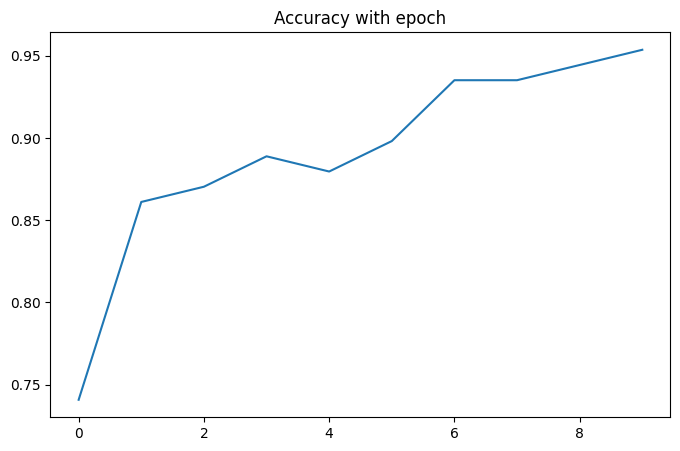


Evaluation against Test Dataset :
----------------------------------
1/1 [==============================] - 0s 18ms/step - loss: 0.2401 - accuracy: 0.8667


[0.24006380140781403, 0.8666666746139526]

In [71]:
#Plot accuracy of the model after each epoch
import matplotlib.pyplot as plt
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy with epoch")
plt.show()

#Evaluate the model against the test dataset
print("\nEvaluation against Test Dataset :\n----------------------------------")
model.evaluate(X_test,Y_test)

### Saving and Loading Models
models needs to be saved after validation, they are then loaded into the env for actual prediction

In [72]:
model.save("iris_save")

#loading a model
loaded_model = keras.models.load_model("iris_save")
#Print
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 128)               640       
                                                                 
 Hidden_layer2 (Dense)       (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions with Deep Learning Models

In [73]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 39ms/step
Raw Prediction Output (Probabilities) : [[0.02809475 0.64752084 0.3243844 ]]
Prediction is  ['versicolor']


References - Ponnambalam, K. (2021). Saving and loading models - Deep Learning: Getting Started Video Tutorial | LinkedIn Learning, formerly Lynda.com. [online] LinkedIn. Available at: https://www.linkedin.com/learning/deep-learning-getting-started/saving-and-loading-models?autoplay=true [Accessed 28 Jan. 2023].